## Importing the necessary libraries

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB

## Importing the data

In [312]:
df= pd.read_csv('mobile_price.csv')

In [313]:
df.head(3)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2


# Analysis

In [314]:
df.shape

(2000, 21)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [316]:
df.isna().sum().any()

False

In [317]:
df.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

In [318]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

### Data Visualization

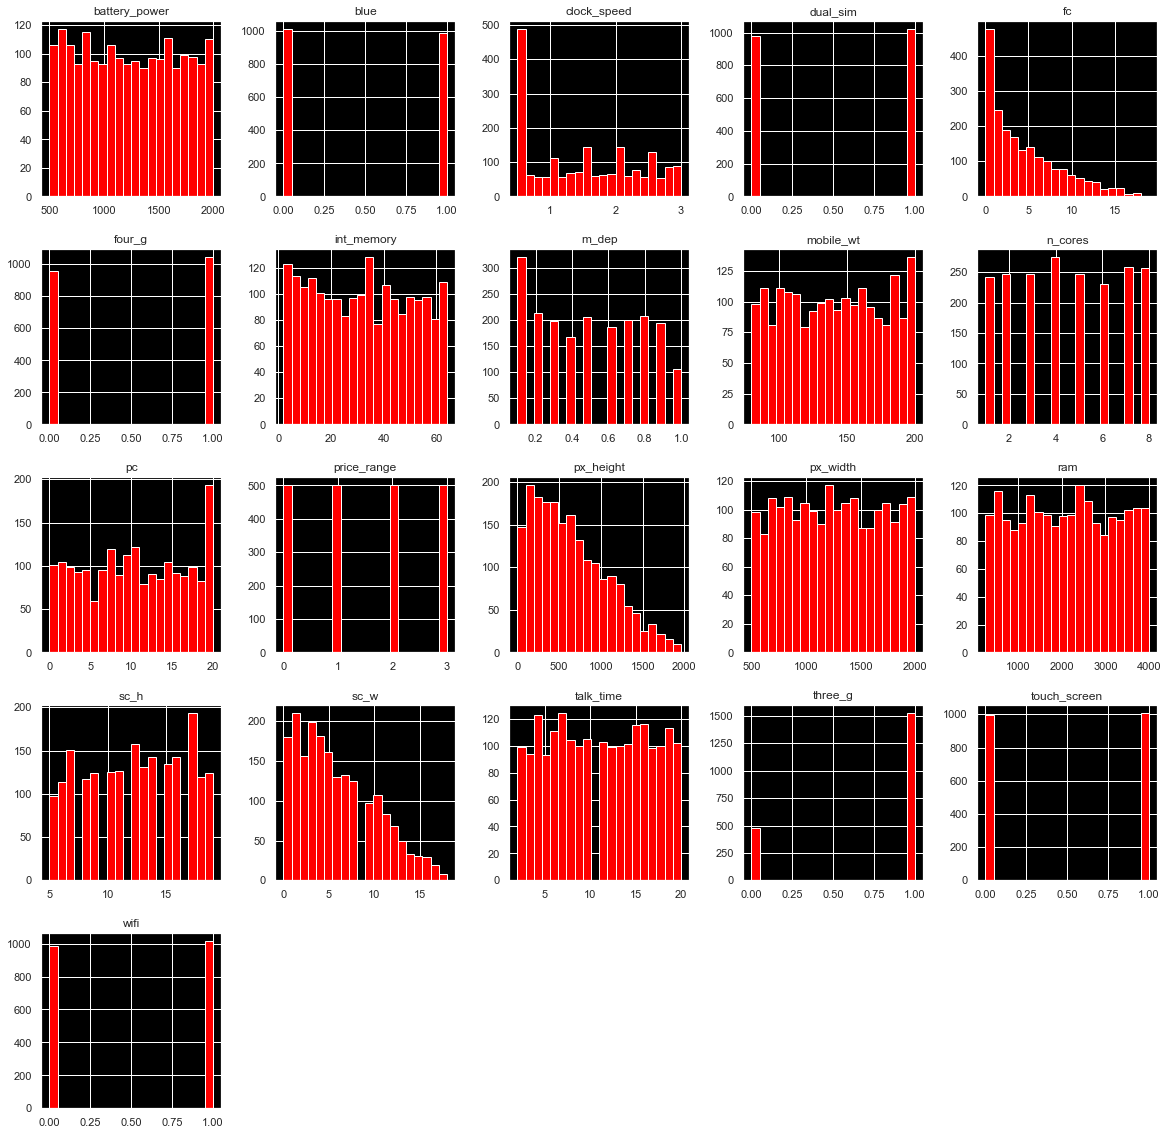

In [319]:
sns.set(rc={'axes.facecolor':'black'})
df.hist(bins=20,figsize=(20,20),color='red')
plt.show()

## Price_range Vs Ram

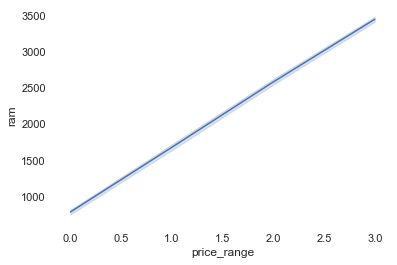

In [320]:
sns.set(rc={'axes.facecolor':'white'})
sns.lineplot(x='price_range', y= 'ram', data=df)
plt.show()

## battery_power vs price_range

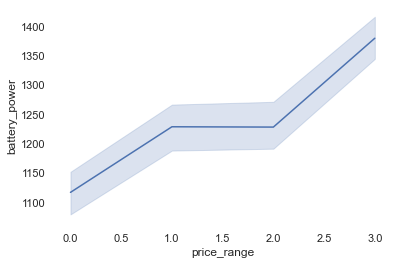

In [321]:
sns.set(rc={'axes.facecolor':'white'})
sns.lineplot(x='price_range', y= 'battery_power', data=df)
plt.show()

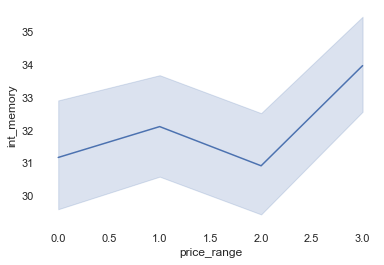

In [322]:
sns.set(rc={'axes.facecolor':'white'})
sns.lineplot(x='price_range', y= 'int_memory', data=df )
plt.show()

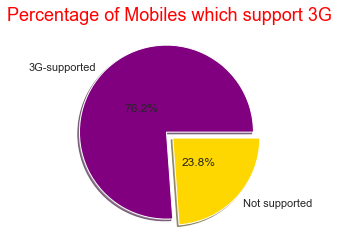

In [323]:
labels = ["3G-supported",'Not supported']
values=df['three_g'].value_counts().values
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,colors=['purple','gold'],
        explode=(0.05,0.05),pctdistance=0.4)
plt.title('Percentage of Mobiles which support 3G',color='red',fontsize=18)
plt.show()



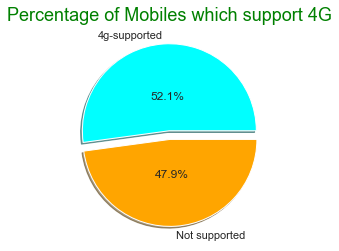

In [324]:
labels = ["4g-supported",'Not supported']
values=df['four_g'].value_counts().values
plt.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,colors=['cyan','orange'],
        explode=(0.05,0.05),pctdistance=0.4)
plt.title('Percentage of Mobiles which support 4G',color='green',fontsize=18)
plt.show()

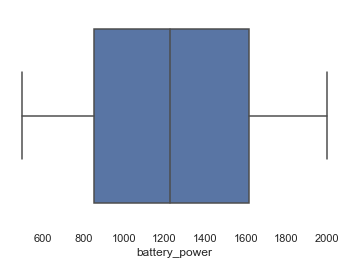

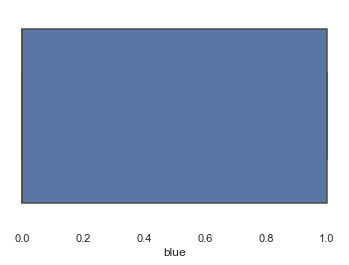

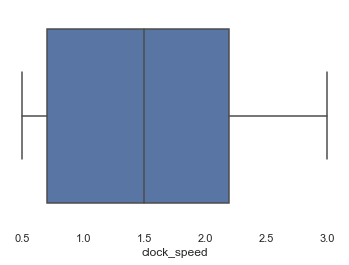

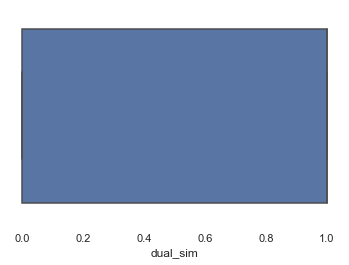

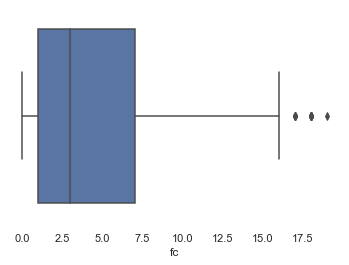

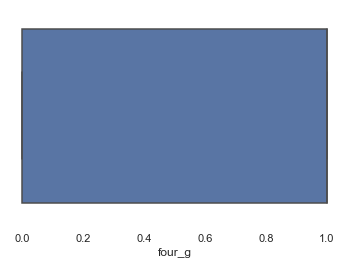

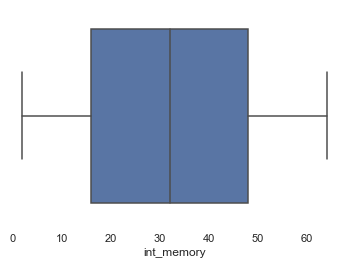

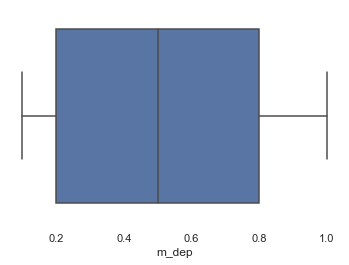

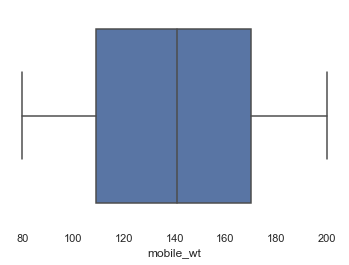

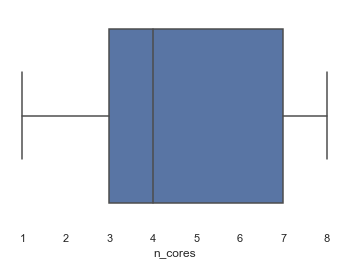

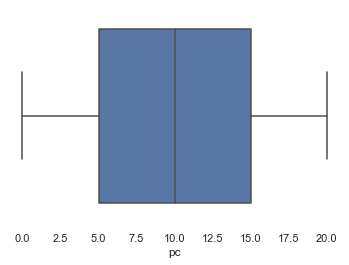

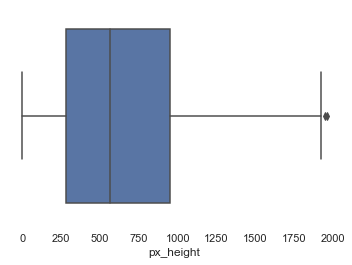

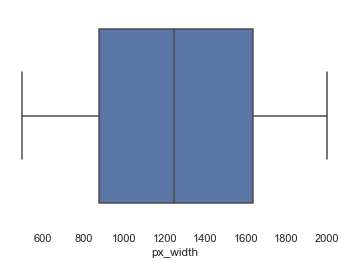

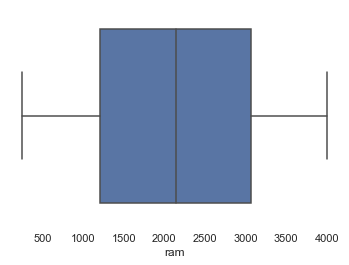

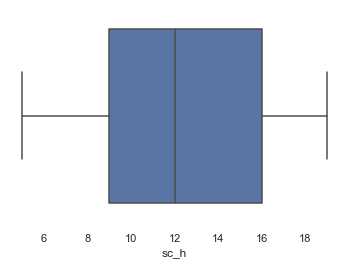

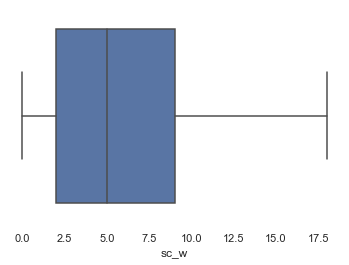

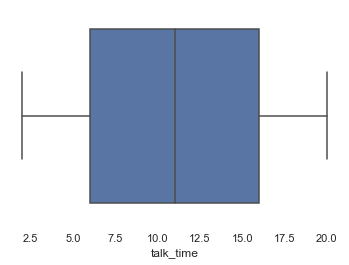

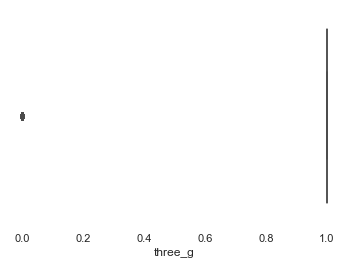

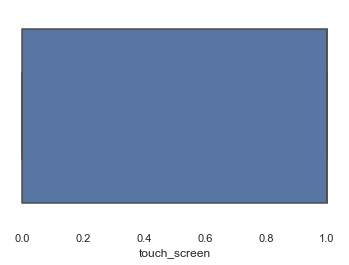

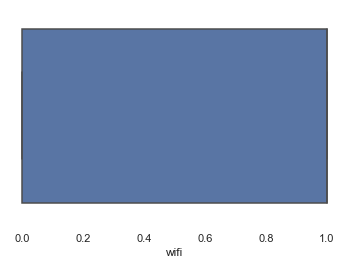

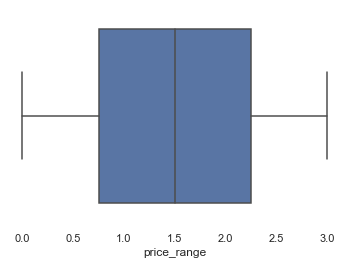

In [325]:
for col in df.columns:
    sns.boxplot(df[col])
    plt.show()

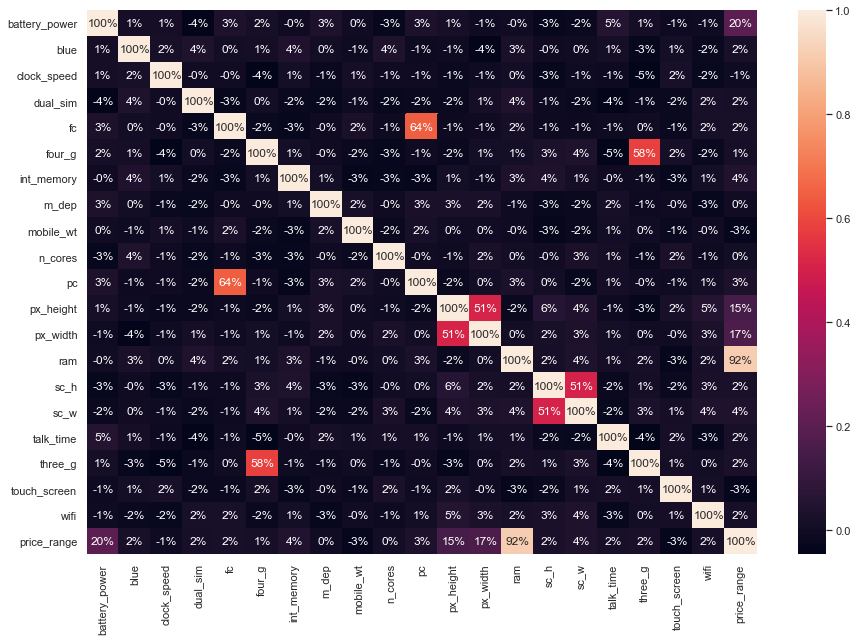

In [326]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt='.0%')
plt.show()

In [327]:
x=df.drop('price_range', axis=1)
y=df.price_range

## If the price range is greater than to 1 then the price range is high otherwise low.
### Here 1 means high price
###              0 means low price

In [328]:
y=y.apply(lambda i: 1 if i>1 else 0)

## Spliting the data

In [329]:
from sklearn.model_selection import train_test_split

In [384]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [385]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1400, 20) (1400,) (600, 20) (600,)


# Feature Selection (using Random Forest Classifier)

In [386]:
labels=df.columns

In [387]:
clf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)


clf.fit(x_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(labels, clf.feature_importances_): 
    print(feature)

('battery_power', 0.05594050144740729)
('blue', 0.00401701641682404)
('clock_speed', 0.017692521820414534)
('dual_sim', 0.003954771566348012)
('fc', 0.01514545576348261)
('four_g', 0.0035260582009057004)
('int_memory', 0.021995771879082655)
('m_dep', 0.013562847883253348)
('mobile_wt', 0.022617383041495676)
('n_cores', 0.014491344041603632)
('pc', 0.017250405982817164)
('px_height', 0.03961733011332013)
('px_width', 0.03890308047701119)
('ram', 0.6699950958801629)
('sc_h', 0.015491234397821914)
('sc_w', 0.017371569112676188)
('talk_time', 0.018267833181417278)
('three_g', 0.0024941468640289908)
('touch_screen', 0.004212417043795032)
('wifi', 0.003453214886131749)


### Identify And Select the Most Important Features
#### We are taking 0.024 as threshold value to Create a selector object that will use the random forest classifier to identify features that have an importance of more than 0.024
 

In [388]:
sfm = SelectFromModel(clf, threshold=0.014)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.014)

In [389]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(labels[feature_list_index])

battery_power
clock_speed
fc
int_memory
mobile_wt
n_cores
pc
px_height
px_width
ram
sc_h
sc_w
talk_time


In [390]:
X_important_train = sfm.transform(x_train)
X_important_test = sfm.transform(x_test)

# Feature Scaling

In [391]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_important_train)
X_test=scaler.transform(X_important_test)

In [ ]:
# Model Building

In [392]:
gnb=GaussianNB()
gnbmodel=gnb.fit(X_train,y_train)

In [393]:
y_pred=gnb.predict(X_test)

In [394]:
print('Training Data accuracy', str(round(gnb.score(X_train,y_train),2)*100) + '%')

Training Data accuracy 94.0%


In [395]:
print('Test Data accuracy', str(round(accuracy_score(y_test,y_pred),2)*100) + '%')

Test Data accuracy 94.0%


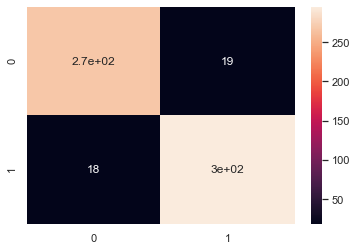

In [396]:
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
plt.show()

In [397]:
confusion_matrix(y_pred,y_test)

array([[268,  19],
       [ 18, 295]], dtype=int64)

In [398]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       286
           1       0.94      0.94      0.94       314

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600

